# Getting bitcoin price data from investing.com data sheet


In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [308]:
df = pd.read_csv(r'../Datasets/BitcoinData.csv', index_col='Date', parse_dates=True)   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print(df)

               Price      Open      High       Low    Vol. Change %
Date                                                               
2022-02-15  43,605.3  42,550.3  43,658.8  42,460.1  56.13K    2.48%
2022-02-14  42,550.3  42,061.1  42,799.7  41,591.3  53.60K    1.16%
2022-02-13  42,061.1  42,205.5  42,725.1  41,880.1  25.88K   -0.34%
2022-02-12  42,205.2  42,388.4  43,006.4  41,776.8  37.88K   -0.43%
2022-02-11  42,388.4  43,519.3  43,915.1  42,023.4  69.95K   -2.60%
...              ...       ...       ...       ...     ...      ...
2015-11-19     325.0     335.9     335.6     323.4  86.38K   -3.26%
2015-11-18     335.9     333.9     337.4     329.4  78.36K    0.60%
2015-11-17     333.9     330.2     342.9     328.1  98.25K    1.12%
2015-11-16     330.2     317.5     332.0     314.1  87.14K    4.02%
2015-11-15     317.5     331.8     334.8     314.2  88.32K   -4.32%

[2285 rows x 6 columns]


In [309]:
df.dtypes

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [310]:
cleanData = df

repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
cleanData['Vol.'] = cleanData['Vol.'].replace(repl_dict, regex=True).map(pd.eval).astype(float)

cleanData['Price'] = cleanData['Price'].astype(str).str.replace(',', '').astype(float)
cleanData['Open'] = cleanData['Open'].astype(str).str.replace(',', '').astype(float)
cleanData['High'] = cleanData['High'].astype(str).str.replace(',', '').astype(float)
cleanData['Low'] = cleanData['Low'].astype(str).str.replace(',', '').astype(float)
cleanData['Change %'] = cleanData['Change %'].astype(str).str.replace('%', '').astype(float)

In [311]:
cleanData.describe()

,Price,Open,High,Low,Vol.,Change %
count,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000
mean,13303.703720,13284.855011,13662.048709,12862.238293,4.889052e+05,0.293527
std,16723.975876,16714.244909,17178.001115,16180.627018,1.275485e+06,3.973664
min,317.500000,317.500000,323.300000,309.500000,2.600000e+02,-39.180000
25%,2362.400000,2344.000000,2494.000000,2263.300000,6.692000e+04,-1.290000
50%,7366.700000,7363.800000,7535.600000,7185.700000,1.326000e+05,0.220000
75%,11506.900000,11503.200000,11823.300000,11226.100000,4.881600e+05,1.910000
max,67527.900000,67528.700000,68990.600000,66334.900000,2.026000e+07,25.560000


In [312]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2285 entries, 2022-02-15 to 2015-11-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2285 non-null   float64
 1   Open      2285 non-null   float64
 2   High      2285 non-null   float64
 3   Low       2285 non-null   float64
 4   Vol.      2285 non-null   float64
 5   Change %  2285 non-null   float64
dtypes: float64(6)
memory usage: 125.0 KB


In [313]:
cleanData.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-02-15,43605.3,42550.3,43658.8,42460.1,56130.0,2.48
2022-02-14,42550.3,42061.1,42799.7,41591.3,53600.0,1.16
2022-02-13,42061.1,42205.5,42725.1,41880.1,25880.0,-0.34
2022-02-12,42205.2,42388.4,43006.4,41776.8,37880.0,-0.43
2022-02-11,42388.4,43519.3,43915.1,42023.4,69950.0,-2.60


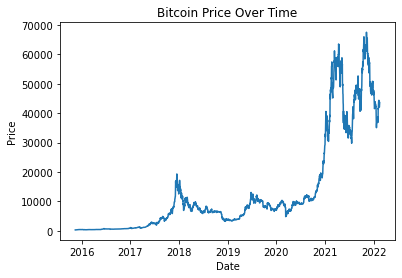

In [314]:
plt.plot(cleanData.Price)
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Data splitting 

In [315]:
# Our predictors will consist of everything but the price
# The target y, will be the values of price, the predictors will be the dataframe without the Price column
# X, Y = cleanData.drop(columns=['Price']), cleanData['Change %']

X, Y = cleanData, cleanData['Change %']
X.shape, Y.shape

((2285, 6), (2285,))

## NN preping

In [316]:
### Training size
trainStart = datetime.datetime(2015, 11, 17)#Start date of training
numOfDays = 2085 #Number of days that will be used to train
trainEnd = trainStart+datetime.timedelta(days=numOfDays)

LastDate = cleanData.iloc[[0]].index[0]

### Testing size
testEnd = cleanData.iloc[[0]].index[0]
daysOut = 50 # predict n days out
testStart = LastDate - datetime.timedelta(days=daysOut)

# Makes sure these don't overlap

In [317]:
cleanData.iloc[[0]].index[0]

Timestamp('2022-02-15 00:00:00')

In [318]:
trainDatadf = X#X[X.index>=trainStart]
trainDatadf = trainDatadf[trainDatadf.index<trainEnd]

trainAnswersdf = Y[Y.index>=trainStart]
trainAnswersdf = trainAnswersdf[trainAnswersdf.index<trainEnd]

In [319]:
testDatadf = X[X.index>=testStart]
testDatadf = testDatadf[testDatadf.index<testEnd]

testAnswersdf = Y[Y.index>=testStart]
testAnswersdf = testAnswersdf[testAnswersdf.index<testEnd]

In [320]:
from nn import *
import numpy

trainDatadf.reset_index(drop=True, inplace=True)
trainAnswersdf.reset_index(drop=True, inplace=True)
testDatadf.reset_index(drop=True, inplace=True)
testAnswersdf.reset_index(drop=True, inplace=True)

trainData = trainDatadf.to_numpy()
# trainAnswer = trainAnswersdf.to_numpy()
testData = testDatadf.to_numpy()
# testAnswer = testAnswersdf.to_numpy()

In [321]:
trainAnswer=np.zeros((len(trainData), 3))
for i in range(len(trainData)):
    if trainDatadf['Change %'][i] == 0:
        trainAnswer[i][1] = 1
        continue
    elif trainDatadf['Change %'][i] > 0:
        trainAnswer[i][0] = 1
        continue 
    elif trainDatadf['Change %'][i] < 0:
        trainAnswer[i][2] = 1
        continue
    
    
testAnswer=np.zeros((len(testDatadf), 3))
for i in range(len(testDatadf)):
    if testDatadf['Change %'][i] == 0:
        testAnswer[i][1] = 1
        continue
    elif testDatadf['Change %'][i] > 0:
        testAnswer[i][0] = 1
        continue 
    elif testDatadf['Change %'][i] < 0:
        testAnswer[i][2] = 1
        continue

In [322]:
trainData.shape, trainAnswer.shape

((2087, 6), (2087, 3))

In [323]:
# The dimensionality of the input data
# self.dim = d
dim = len(trainDatadf.columns)
# The number of hidden layers
# self.num_layers = nl
nl = 5
# The size of each hidden layer
# self.layer_size = ls
ls = 10
# The step size used in gradient descent
# self.rate = r
# self.bias = b
r = .1
b = True
#dim of the outputted vector
# self.outDim = out
outDim = 3 #Up, Same, or Down


fred = NN(dim, nl, ls, r, b, outDim)

In [324]:
fred.reset()

In [325]:
fred.train_rounds(trainData, trainAnswer, 100)

/home/dawsboss/GitHub/DSCI490/src/nn.py:81: RuntimeWarning: overflow encountered in exp
  arr.astype('float128')


Current loss: 1042.9404117159422


1042.9404117159422

In [326]:
fred.train_rounds(trainData, trainAnswer, 1000)

Current loss: 1042.9649225993658


1042.9649225993658

In [327]:
t = fred.predict(testData[0], testAnswer[0], ["Up","Same","Down"])
print(f'{testData[0]} | {testAnswer[0]} => {t}')

[4.25503e+04 4.20611e+04 4.27997e+04 4.15913e+04 5.36000e+04 1.16000e+00] | [1. 0. 0.] => Up


In [328]:
##[Up, Same, Down]

for i in range(len(testData)):
    t = fred.predict(testData[i], testAnswer[i], ["Up","Same","Down"])
    print(f' | {testAnswer[i]} => {t}')

 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [1. 0. 0.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
 | [0. 0. 1.] => Up
